In [1]:
import numpy as np
import torch
import torchvision

from datasets.afd import make_afd_loaders
from datasets.dunnings import make_dunnings_test_loader, make_dunnings_train_loader
from models import FireClassifier
from utils import accuracy_gpu

BATCH_SIZE = 32
EPOCHS = 10
PRINT_EVERY = 20  # batches

dataset_paths = {
    "mine": "~/pro/fire_aerial2k_dataset/",
    "dunnings_train": "/media/tomek/BIG2/datasets/FIRE/dunnings/fire-dataset-dunnings/images-224x224/train",
    "dunnings_test": "/media/tomek/BIG2/datasets/FIRE/dunnings/fire-dataset-dunnings/images-224x224/test",
}

afd_train, afd_val = make_afd_loaders(dataset_paths["mine"], batch_size=BATCH_SIZE)

dunnings_train = make_dunnings_train_loader(
    dataset_paths["dunnings_train"], batch_size=BATCH_SIZE
)

dunnings_test = make_dunnings_test_loader(
    dataset_paths["dunnings_test"], batch_size=BATCH_SIZE
)


train_afd = afd_train
train_dunnings = dunnings_train
valid = afd_val
test = dunnings_test

In [43]:
img_sum = torch.zeros((3, 224, 224))

# Means

In [44]:
for data in afd_train:
    img_batch = data[0]
    for im in img_batch:        
        img_sum += im

In [45]:
for data in dunnings_train:
    img_batch = data[0]
    for im in img_batch:        
        img_sum += im

In [47]:
img_num = len(dunnings_train)*32 + len(afd_train)*32

In [64]:
t_mean = torch.mean(img_sum,axis=[1,2])/img_num
t_mean

tensor([0.4005, 0.3702, 0.3419])

# Std devs

In [69]:
t_mean = t_mean[(..., ) + (None, ) * 2] # add two dimensions
t_mean.shape

torch.Size([3, 1, 1])

In [76]:
avg_sq_sum = torch.zeros(3)

In [ ]:
for data in afd_train:
    img_batch = data[0]
    for im in img_batch:        
        avg_sq_sum += torch.mean(torch.pow(im - t_mean, 2), axis=[1,2])

In [79]:
for data in dunnings_train:
    img_batch = data[0]
    for im in img_batch:        
        avg_sq_sum += torch.mean(torch.pow(im - t_mean, 2), axis=[1,2])

In [80]:
stdev = torch.sqrt(avg_sq_sum / img_num)
stdev

tensor([0.2858, 0.2749, 0.2742])

In [83]:
import matplotlib.pyplot as plt

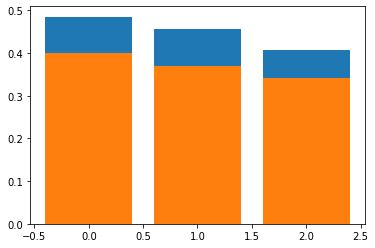

In [87]:
plt.bar(range(3), height=[0.485, 0.456, 0.406])
plt.bar(range(3), height=[0.4005, 0.3702, 0.3419])
plt.show()

In [60]:
im - torch.unsqueeze(torch.tensor([0.4005, 0.3702, 0.3419]), dim=0)

RuntimeError: The size of tensor a (224) must match the size of tensor b (3) at non-singleton dimension 2

In [ ]:
for data in afd_train:
    img_batch = data[0]
    for im in img_batch:        
        img_sum += im

In [51]:
#Std dev

In [41]:
torch.mean(img_sum,axis=[1,2])/1824 * 255

tensor([113.0427, 111.2521, 106.3413])

In [31]:
img_sum.shape

torch.Size([3, 224, 224])

In [13]:
data[0].max()

tensor(1.)